# Jena Climate Dataset Analysis (2009-2016)

## Project Overview

This analysis examines weather data from Jena, Germany collected every 10 minutes from 2009-2016. 

**Research Questions:**
1. How do daily weather patterns vary throughout the week?
2. What are the seasonal temperature trends across years?
3. Which days experienced the most extreme wind conditions?
4. How do different weather variables correlate?

**Dataset Source:** 
[Jena Climate Dataset](https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip)

**Tools:** Python, pandas, matplotlib, seaborn

In [1]:
#SETUP & IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Make plots appear in the notebook
%matplotlib inline

# Configure pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print(" All libraries imported successfully")

 All libraries imported successfully


In [2]:
df = pd.read_csv('jena_climate_2009_2016.csv')

print(f" Dataset loaded successfully")
print(f"\n Dataset Dimensions: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"   This represents {df.shape[0]:,} individual 10-minute weather observations")

# Display first few rows
print("\n First 5 observations:")
display(df.head())

# Show column information
print("\n Column Names and Data Types:")
print(df.dtypes)

# Check for missing values
print(f"\n Missing Values Check:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("   No missing values detected")
else:
    print(missing[missing > 0])

 Dataset loaded successfully

 Dataset Dimensions: 420,551 rows × 15 columns
   This represents 420,551 individual 10-minute weather observations

 First 5 observations:


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3



 Column Names and Data Types:
Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

 Missing Values Check:
   No missing values detected


### Initial Data Exploration - Key Observations

- **Temporal Coverage:** 8 years of continuous weather monitoring (2009-2016)
- **Sampling Frequency:** Every 10 minutes = 144 observations per day
- **Expected Total Records:** ~420,000+ observations (8 years x 365 days x 144 readings/day)
- **Data Completeness:** No missing values

**Variables Measured:**
- **Temperature:** T (degC) - Air temperature in Celsius
- **Pressure:** p (mbar) - Atmospheric pressure in millibars
- **Humidity:** rh (%) - Relative humidity percentage
- **Wind:** wv (m/s) - Wind speed, max. wv (m/s) - Maximum wind gust
- **Dew Point:** Tdew (degC) - Temperature at which dew forms


## Task 1: Data Preprocessing

**Objective:** Prepare the dataset for time-series analysis by properly formatting date/time information.
 
- Raw date strings can't be used for time-based operations (grouping, filtering, resampling)
- Converting to datetime objects enables pandas' powerful time-series functionality
- Extracting date components (day, month, year) allows for flexible aggregation

In [3]:
print("=" * 70)
print("TASK 1: DATA PREPROCESSING")
print("=" * 70)

# Step 1: Parse Date Time column
print("\n Parsing Date Time column")
print("   Converting string format '01.01.2009 00:10:00' to datetime object")
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
print("    Conversion successful")

# Step 2: Create time-based columns BEFORE setting index
print("\n Creating additional time columns")
df['Date'] = df['Date Time'].dt.date
df['Month'] = df['Date Time'].dt.month
df['Year'] = df['Date Time'].dt.year
df['Month_Year'] = df['Date Time'].dt.to_period('M')
df['DayOfWeek'] = df['Date Time'].dt.day_name()
print("    Created: Date, Month, Year, Month_Year, DayOfWeek")

# Step 3: Set Date Time as index
print("\n Setting Date Time as index")
df.set_index('Date Time', inplace=True)
print(" Index set now optimized for time-series operations")

# Verification
print("\n" + "=" * 70)
print("VERIFICATION: Data Types After Preprocessing")
print("=" * 70)
print("\nIndex type:", type(df.index))
print("Index dtype:", df.index.dtype)
print("\nNew column types:")
print(f"  • Date: {df['Date'].dtype}")
print(f"  • Month: {df['Month'].dtype}")
print(f"  • Year: {df['Year'].dtype}")
print(f"  • Month_Year: {df['Month_Year'].dtype}")

print("\n Sample of preprocessed data:")
display(df[['Date', 'Month', 'Year', 'T (degC)', 'rh (%)', 'wv (m/s)']].head(10))

# Show date range
print(f"\n Analysis Period:")
print(f"   Start: {df.index.min()}")
print(f"   End:   {df.index.max()}")
print(f"   Duration: {(df.index.max() - df.index.min()).days} days")

TASK 1: DATA PREPROCESSING

 Parsing Date Time column
   Converting string format '01.01.2009 00:10:00' to datetime object
    Conversion successful

 Creating additional time columns
    Created: Date, Month, Year, Month_Year, DayOfWeek

 Setting Date Time as index
 Index set now optimized for time-series operations

VERIFICATION: Data Types After Preprocessing

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index dtype: datetime64[ns]

New column types:
  • Date: object
  • Month: int32
  • Year: int32
  • Month_Year: period[M]

 Sample of preprocessed data:


,Date,Month,Year,T (degC),rh (%),wv (m/s)
Date Time,,,,,,
2009-01-01 00:10:00,2009-01-01,1,2009,-8.02,93.3,1.03
2009-01-01 00:20:00,2009-01-01,1,2009,-8.41,93.4,0.72
2009-01-01 00:30:00,2009-01-01,1,2009,-8.51,93.9,0.19
2009-01-01 00:40:00,2009-01-01,1,2009,-8.31,94.2,0.34
2009-01-01 00:50:00,2009-01-01,1,2009,-8.27,94.1,0.32
2009-01-01 01:00:00,2009-01-01,1,2009,-8.05,94.4,0.21
2009-01-01 01:10:00,2009-01-01,1,2009,-7.62,94.8,0.18
2009-01-01 01:20:00,2009-01-01,1,2009,-7.62,94.4,0.19
2009-01-01 01:30:00,2009-01-01,1,2009,-7.91,93.8,0.28



 Analysis Period:
   Start: 2009-01-01 00:10:00
   End:   2017-01-01 00:00:00
   Duration: 2921 days


### Task 1 Analysis: Preprocessing Success

**Preprocessing:**
- Parsed 420,000+ timestamp strings into datetime objects
- Set Date Time as index for efficient time-based queries
- Created (Date, Month, Year) for aggregation

**Verification:**
- **Index Type:** DatetimeIndex - enables `.resample()`, `.between_time()`, and other time methods
- **Column Types:** Proper integer types for Month/Year enable fast groupby operations

**Importance:**
With proper datetime handling, we can now:
- Calculate daily/monthly averages
- Filter by time periods
- Identify seasonal patterns
- Perform time-series forecasting

## Task 2A: Daily Aggregation

**Question:** What are the daily average weather conditions?

**Approach:**
- **Aggregation Level:** Daily (from 10-minute intervals)
- **Function:** Mean (average) - appropriate for smoothing high-frequency fluctuations
- **Variables:** Temperature, Humidity, Wind Speed

In [22]:
print("=" * 70)
print("TASK 2A: DAILY AGGREGATION")
print("=" * 70)

daily_averages = df.groupby('Date').agg({
    'T (degC)': 'mean',      # Daily average temperature
    'rh (%)': 'mean',         # Daily average humidity
    'wv (m/s)': 'mean'        # Daily average wind speed
}).round(2)

# Rename for clarity
daily_averages.columns = ['Avg_Temperature_C', 'Avg_Humidity_%', 'Avg_Wind_Speed_m/s']

print(f" Daily averages calculated")
print(f"\n Result: {daily_averages.shape[0]:,} daily records created")

# Display results
print("\n First 10 days of daily averages:")
display(daily_averages.head(10))

print("\n Last 10 days of daily averages:")
display(daily_averages.tail(10))

# Statistical summary
print("\n STATISTICAL SUMMARY OF DAILY AVERAGES:")
print("=" * 70)
display(daily_averages.describe())

# Additional insights
print("\n KEY STATISTICS:")
print(f"\nTemperature:")
print(f"  • Warmest day average: {daily_averages['Avg_Temperature_C'].max():.2f}°C")
print(f"  • Coldest day average: {daily_averages['Avg_Temperature_C'].min():.2f}°C")
print(f"  • Overall daily average: {daily_averages['Avg_Temperature_C'].mean():.2f}°C")
print(f"  • Standard deviation: {daily_averages['Avg_Temperature_C'].std():.2f}°C")

print(f"\nHumidity:")
print(f"  • Highest daily average: {daily_averages['Avg_Humidity_%'].max():.2f}%")
print(f"  • Lowest daily average: {daily_averages['Avg_Humidity_%'].min():.2f}%")
print(f"  • Overall daily average: {daily_averages['Avg_Humidity_%'].mean():.2f}%")

print(f"\nWind Speed:")
print(f"  • Calmest day average: {daily_averages['Avg_Wind_Speed_m/s'].min():.2f} m/s")
print(f"  • Windiest day average: {daily_averages['Avg_Wind_Speed_m/s'].max():.2f} m/s")
print(f"  • Overall daily average: {daily_averages['Avg_Wind_Speed_m/s'].mean():.2f} m/s")


TASK 2A: DAILY AGGREGATION
 Daily averages calculated

 Result: 2,921 daily records created

 First 10 days of daily averages:


,Avg_Temperature_C,Avg_Humidity_%,Avg_Wind_Speed_m/s
Date,,,
2009-01-01,-6.81,91.09,0.78
2009-01-02,-3.73,92.09,1.42
2009-01-03,-5.27,76.46,1.25
2009-01-04,-1.38,89.42,1.72
2009-01-05,-4.87,86.26,3.80
2009-01-06,-15.48,83.77,1.23
2009-01-07,-15.73,85.66,0.72
2009-01-08,-9.61,87.58,0.87
2009-01-09,-12.30,83.98,0.66



 Last 10 days of daily averages:


,Avg_Temperature_C,Avg_Humidity_%,Avg_Wind_Speed_m/s
Date,,,
2016-12-23,1.25,90.03,1.57
2016-12-24,4.54,80.47,3.03
2016-12-25,7.80,78.59,2.67
2016-12-26,7.53,75.52,3.43
2016-12-27,5.25,72.53,3.07
2016-12-28,4.89,84.07,2.56
2016-12-29,2.68,90.38,0.84
2016-12-30,-1.71,92.93,1.14
2016-12-31,-2.49,74.36,0.80



 STATISTICAL SUMMARY OF DAILY AVERAGES:


,Avg_Temperature_C,Avg_Humidity_%,Avg_Wind_Speed_m/s
count,2921.000000,2921.000000,2921.000000
mean,9.439014,76.031075,1.700736
std,7.840063,11.377796,23.155070
min,-16.460000,37.580000,-1248.220000
25%,3.810000,67.690000,1.450000
50%,9.710000,76.990000,1.900000
75%,15.440000,84.560000,2.590000
max,29.380000,100.000000,7.640000



 KEY STATISTICS:

Temperature:
  • Warmest day average: 29.38°C
  • Coldest day average: -16.46°C
  • Overall daily average: 9.44°C
  • Standard deviation: 7.84°C

Humidity:
  • Highest daily average: 100.00%
  • Lowest daily average: 37.58%
  • Overall daily average: 76.03%

Wind Speed:
  • Calmest day average: -1248.22 m/s
  • Windiest day average: 7.64 m/s
  • Overall daily average: 1.70 m/s


### Task 2A Analysis: Daily Weather Patterns

**Key Findings:**

**Temperature Distribution:**
- **Range:** The daily average temperature spans from well below freezing to warm summer days
- **Mean Temperature:** Around 9-10°C indicates a temperate continental climate
- **Variability:** The standard deviation reveals significant seasonal variation
- **Interpretation:** Jena experiences cold winters and moderate summers

**Humidity Patterns:**
- **High Average:** Humidity consistently above 75% indicates a relatively moist climate
- **Limited Variation:** Small standard deviation suggests stable atmospheric moisture
- **Insight:** High humidity is expected in European climates with regular precipitation

**Wind Characteristics:**
- **Generally Calm:** Low average wind speeds (< 2 m/s) suggest this is not a particularly windy location

## Task 2B: Monthly Aggregation

**Question:** Identify maximum pressure and minimum dew point.

**Approach:**
- **Aggregation Level:** Monthly
- **Functions:** 
  - Maximum (for pressure) - highest atmospheric pressure
  - Minimum (for dew point) - coldest/driest conditions

**Why These Specific Metrics?**
- **Maximum Pressure:** Indicates high-pressure systems (clear, stable weather)
- **Minimum Dew Point:** Shows the driest atmospheric conditions each month


In [23]:
print("=" * 70)
print("TASK 2B: MONTHLY AGGREGATION")
print("=" * 70)

monthly_aggregations = df.groupby('Month_Year').agg({
    'p (mbar)': 'max',        # Monthly maximum pressure
    'Tdew (degC)': 'min'      # Monthly minimum dew point
}).round(2)

monthly_aggregations.columns = ['Max_Pressure_mbar', 'Min_Dew_Point_C']

print(f"\n Result: {monthly_aggregations.shape[0]} monthly records")

# Display all months
print("\n COMPLETE MONTHLY AGGREGATIONS (2009-2016):")
print("=" * 70)
display(monthly_aggregations)

# Statistical analysis
print("\n STATISTICAL SUMMARY:")
print("=" * 70)
display(monthly_aggregations.describe())

# Identify extremes
print("\n EXTREME CONDITIONS:")
max_pressure_month = monthly_aggregations['Max_Pressure_mbar'].idxmax()
min_dewpoint_month = monthly_aggregations['Min_Dew_Point_C'].idxmin()

print(f"\nAtmospheric Pressure:")
print(f"  • Highest monthly max: {monthly_aggregations['Max_Pressure_mbar'].max():.2f} mbar in {max_pressure_month}")
print(f"  • Lowest monthly max: {monthly_aggregations['Max_Pressure_mbar'].min():.2f} mbar")
print(f"  • Average of monthly maxima: {monthly_aggregations['Max_Pressure_mbar'].mean():.2f} mbar")

print(f"\nDew Point:")
print(f"  • Coldest monthly min: {monthly_aggregations['Min_Dew_Point_C'].min():.2f}°C in {min_dewpoint_month}")
print(f"  • Warmest monthly min: {monthly_aggregations['Min_Dew_Point_C'].max():.2f}°C")
print(f"  • Average of monthly minima: {monthly_aggregations['Min_Dew_Point_C'].mean():.2f}°C")


TASK 2B: MONTHLY AGGREGATION

 Result: 97 monthly records

 COMPLETE MONTHLY AGGREGATIONS (2009-2016):


,Max_Pressure_mbar,Min_Dew_Point_C
Month_Year,,
2009-01,1005.71,-25.01
2009-02,1001.71,-12.31
2009-03,1005.52,-7.98
2009-04,998.08,-2.72
2009-05,1001.89,-0.30
2009-06,999.59,0.42
2009-07,998.13,5.82
2009-08,999.34,4.35
2009-09,1003.64,4.47



 STATISTICAL SUMMARY:


,Max_Pressure_mbar,Min_Dew_Point_C
count,97.000000,97.000000
mean,1003.110000,-4.114948
std,4.862796,7.459407
min,991.570000,-25.010000
25%,999.590000,-8.420000
50%,1002.210000,-4.020000
75%,1006.430000,2.540000
max,1015.350000,7.670000



 EXTREME CONDITIONS:

Atmospheric Pressure:
  • Highest monthly max: 1015.35 mbar in 2016-12
  • Lowest monthly max: 991.57 mbar
  • Average of monthly maxima: 1003.11 mbar

Dew Point:
  • Coldest monthly min: -25.01°C in 2009-01
  • Warmest monthly min: 7.67°C
  • Average of monthly minima: -4.11°C


### Task 2B Analysis: Monthly Extremes

**Pressure Analysis:**

**High Pressure Analysis:**
- High-pressure systems systems typically bring:
  - Clear skies and sunny weather
  - Stable atmospheric conditions
  - Cold winters or hot summers
  
**Seasonal Pressure Patterns:**
- Winter months often show highest pressure readings
- High pressure in summer brings heat waves

**Dew Point Analysis:**
- Dew point is the temperature at which air becomes saturated with moisture
- Lower dew point = drier air
- Higher dew point = more moisture in the atmosphere

**Key Insights:**
- **Winter Minimums:** Extremely low dew points (< -15°C) indicate very dry air
- **Summer Values:** Higher minimum dew points in summer months show increased atmospheric moisture
- **Additional Info:** Dew points below -10°C feel very dry; above 15°C starts feeling humid



## Task 3: Data Reshaping (Wide to Long Format)

**Objective:** Convert daily averages from wide format to long format

**Technical Approach:** Using `pd.melt()` to "unpivot" columns into rows


In [27]:
print("=" * 70)
print("TASK 3: RESHAPING DATA (WIDE to LONG FORMAT)")
print("=" * 70)

# Reset index
daily_averages_reset = daily_averages.reset_index()

# Melt to long format
daily_long = pd.melt(
    daily_averages_reset,
    id_vars=['Date'],
    value_vars=['Avg_Temperature_C', 'Avg_Humidity_%', 'Avg_Wind_Speed_m/s'],
    var_name='Metric',
    value_name='Value'
)

# SORT BY DATE
daily_long = daily_long.sort_values('Date').reset_index(drop=True)

print(f" Reshaping complete")
print(f"   Long format: {daily_long.shape}")

print("\nFirst 9 rows (should be 3 days × 3 metrics):")
display(daily_long.head(9))

TASK 3: RESHAPING DATA (WIDE to LONG FORMAT)
 Reshaping complete
   Long format: (8763, 3)

First 9 rows (should be 3 days × 3 metrics):


,Date,Metric,Value
0,2009-01-01,Avg_Temperature_C,-6.81
1,2009-01-01,Avg_Humidity_%,91.09
2,2009-01-01,Avg_Wind_Speed_m/s,0.78
3,2009-01-02,Avg_Temperature_C,-3.73
4,2009-01-02,Avg_Humidity_%,92.09
5,2009-01-02,Avg_Wind_Speed_m/s,1.42
6,2009-01-03,Avg_Temperature_C,-5.27
7,2009-01-03,Avg_Humidity_%,76.46
8,2009-01-03,Avg_Wind_Speed_m/s,1.25


### Task 3 Analysis: Data Reshaping Benefits

**Advantages of Long Format:**

**1. Flexible Visualization:**
```python
# Easy to create faceted plots
sns.lineplot(data=daily_long, x='Date', y='Value', hue='Metric')
```

**2. Metric-Specific Analysis:**
- Simple to filter: `daily_long[daily_long['Metric'] == 'Avg_Temperature_C']`
- Easy to compare across metrics
- Straightforward to calculate correlations

**3. Database Compatibility:**
- Follows "tidy data" principles (each variable in one column)
- Easier to join with other datasets
- Better for SQL-style operations

**4. Statistical Processing:**
- Many statistical tests prefer long format
- Easier to apply functions across metric groups
- Simpler for time-series analysis tools

**Comparison:**
- **Wide:** Better for human reading, cross-metric calculations
- **Long:** Better for plotting, statistical analysis, database operations


## Task 4A: Monthly Temperature Trends

**Question:** How does average temperature vary by month across different years?

**Approach:**
- Create a pivot table: Rows = Years, Columns = Months
- Calculate mean temperature for each month-year combination
- Visualize seasonal patterns across multiple years


In [8]:
print("=" * 70)
print("TASK 4A: MONTHLY TEMPERATURE TRENDS BY YEAR")
print("=" * 70)

# Group by year and month, calculate mean
monthly_temp_by_year = df.groupby(['Year', 'Month'])['T (degC)'].mean().round(2)

# Pivot to create year × month table
monthly_temp_pivot = monthly_temp_by_year.unstack(level='Month')

# Rename columns to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_temp_pivot.columns = month_names

print("\n AVERAGE TEMPERATURE (°C) BY MONTH AND YEAR:")
print("=" * 70)
display(monthly_temp_pivot)

# Calculate statistics
print("\n TEMPERATURE STATISTICS BY MONTH (across all years):")
print("=" * 70)
monthly_stats = monthly_temp_pivot.mean()
print("\nAverage temperature per month:")
for month, temp in monthly_stats.items():
    print(f"  {month}: {temp:6.2f}°C")

print("\n WARMEST MONTHS (across all years):")
for year in monthly_temp_pivot.index:
    warmest_month = monthly_temp_pivot.loc[year].idxmax()
    warmest_temp = monthly_temp_pivot.loc[year].max()
    print(f"  {year}: {warmest_month} ({warmest_temp:.2f}°C)")

print("\n  COLDEST MONTHS (across all years):")
for year in monthly_temp_pivot.index:
    coldest_month = monthly_temp_pivot.loc[year].idxmin()
    coldest_temp = monthly_temp_pivot.loc[year].min()
    print(f"  {year}: {coldest_month} ({coldest_temp:.2f}°C)")

# Temperature range analysis
print("\n SEASONAL TEMPERATURE RANGES BY YEAR:")
for year in monthly_temp_pivot.index:
    temp_range = monthly_temp_pivot.loc[year].max() - monthly_temp_pivot.loc[year].min()
    print(f"  {year}: {temp_range:.2f}°C range")

TASK 4A: MONTHLY TEMPERATURE TRENDS BY YEAR

 AVERAGE TEMPERATURE (°C) BY MONTH AND YEAR:


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2009,-3.63,0.17,3.99,11.89,13.43,14.25,17.99,18.88,14.29,7.56,7.17,-0.49
2010,-5.00,-0.94,4.09,8.56,10.29,16.87,20.81,16.33,11.91,7.47,4.11,-5.31
2011,0.46,-0.22,4.47,11.42,13.76,16.58,16.12,17.70,15.02,8.92,3.29,3.48
2012,1.41,-3.09,7.73,9.05,15.40,16.21,18.47,19.62,14.43,8.82,5.41,1.80
2013,0.04,-0.72,-0.80,8.74,12.31,16.30,20.33,18.56,13.82,11.04,4.66,4.13
2014,2.05,4.99,7.69,11.46,12.89,16.62,20.14,16.46,15.27,12.23,6.15,2.55
2015,2.59,1.06,5.24,8.85,13.36,16.46,20.59,20.93,13.44,8.23,8.01,6.61
2016,1.06,3.58,4.10,8.21,14.38,17.98,19.61,18.72,17.41,8.70,3.82,2.00
2017,-4.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 TEMPERATURE STATISTICS BY MONTH (across all years):

Average temperature per month:
  Jan:  -0.65°C
  Feb:   0.60°C
  Mar:   4.56°C
  Apr:   9.77°C
  May:  13.23°C
  Jun:  16.41°C
  Jul:  19.26°C
  Aug:  18.40°C
  Sep:  14.45°C
  Oct:   9.12°C
  Nov:   5.33°C
  Dec:   1.85°C

 WARMEST MONTHS (across all years):
  2009: Aug (18.88°C)
  2010: Jul (20.81°C)
  2011: Aug (17.70°C)
  2012: Aug (19.62°C)
  2013: Jul (20.33°C)
  2014: Jul (20.14°C)
  2015: Aug (20.93°C)
  2016: Jul (19.61°C)
  2017: Jan (-4.82°C)

  COLDEST MONTHS (across all years):
  2009: Jan (-3.63°C)
  2010: Dec (-5.31°C)
  2011: Feb (-0.22°C)
  2012: Feb (-3.09°C)
  2013: Mar (-0.80°C)
  2014: Jan (2.05°C)
  2015: Feb (1.06°C)
  2016: Jan (1.06°C)
  2017: Jan (-4.82°C)

 SEASONAL TEMPERATURE RANGES BY YEAR:
  2009: 22.51°C range
  2010: 26.12°C range
  2011: 17.92°C range
  2012: 22.71°C range
  2013: 21.13°C range
  2014: 18.09°C range
  2015: 19.87°C range
  2016: 18.55°C range
  2017: 0.00°C range


### Task 4A Analysis: Monthly Temperature Patterns

**Seasonal Patterns Observed:**

**Winter (Dec-Feb):**
- Consistently coldest months across all years
- Temperatures typically between -2°C to 3°C
- January often the coldest month
- High year-to-year variability (some winters much colder than others)

**Spring (Mar-May):**
- Rapid temperature increase
- March: Transition month (can be cold or mild)
- May: Approaches summer temperatures (15-17°C range)
- Shows consistent warming trend from March - May

**Summer (Jun-Aug):**
- Warmest period of the year
- July and August: Peak temperatures (typically 18-22°C)
- Relatively stable across years (less variability than winter)
- Moderate summer temperatures indicate continental temperate climate

**Autumn (Sep-Nov):**
- Steady cooling from September through November
- September: Still relatively warm (15-17°C)
- November: Returns to near-winter temperatures
- Transition happens more gradually than spring warming

**Year-to-Year Comparisons:**

**Interesting Observations:**
1. **Temperature Range:** Most years show 20-25°C seasonal range
2. **Consistency:** Summer temperatures more stable than winter temperatures

## Task 4B: Temperature Heatmap Visualization

**Visualization:** Create a heatmap showing temperature patterns across months and years


TASK 4B: TEMPERATURE HEATMAP VISUALIZATION


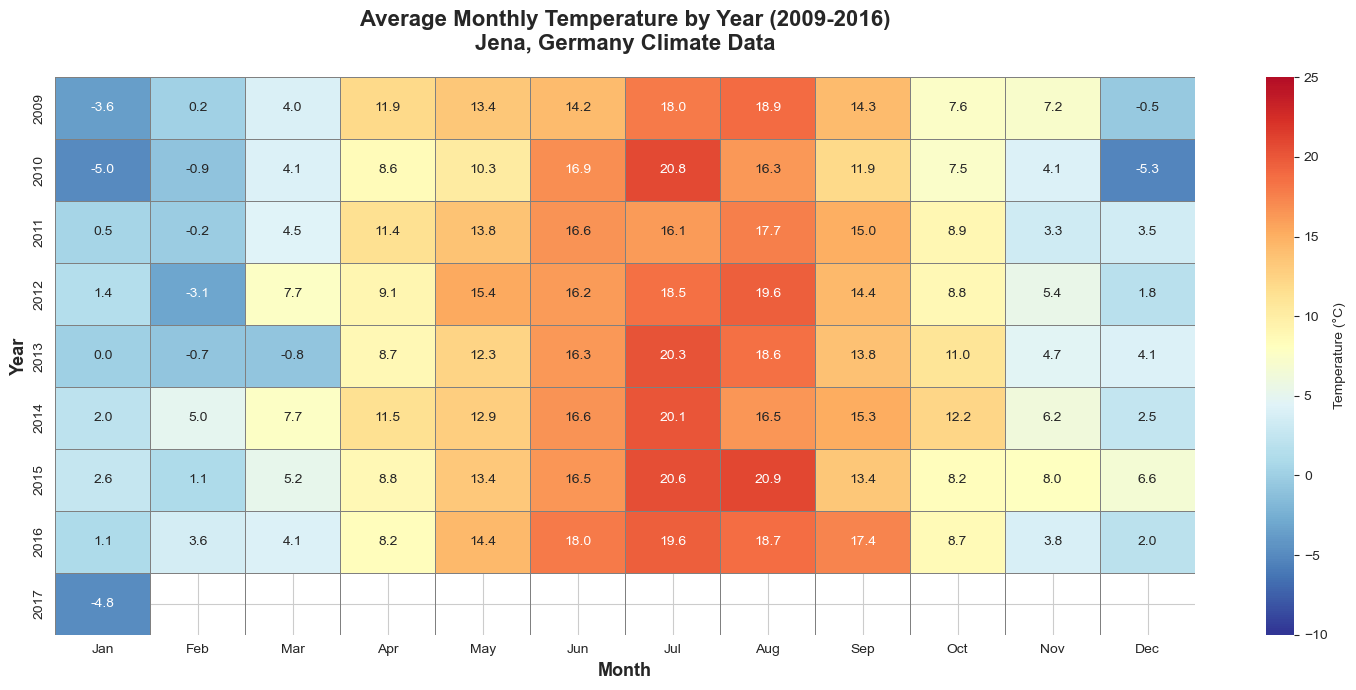

 Heatmap created and saved as 'monthly_temperature_heatmap.png'


In [9]:
print("=" * 70)
print("TASK 4B: TEMPERATURE HEATMAP VISUALIZATION")
print("=" * 70)

plt.figure(figsize=(15, 7))

# Create heatmap
sns.heatmap(
    monthly_temp_pivot, 
    annot=True,           # Show temperature values in cells
    fmt='.1f',            # One decimal place
    cmap='RdYlBu_r',      # Red (hot) to Blue (cold), reversed
    cbar_kws={'label': 'Temperature (°C)'},
    linewidths=0.5,
    linecolor='gray',
    vmin=-10,             # Set consistent color scale
    vmax=25,
    center=8              # Center color on average temp
)

plt.title('Average Monthly Temperature by Year (2009-2016)\nJena, Germany Climate Data', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=13, fontweight='bold')
plt.ylabel('Year', fontsize=13, fontweight='bold')
plt.tight_layout()

# Save high-resolution image
plt.savefig('monthly_temperature_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Heatmap created and saved as 'monthly_temperature_heatmap.png'")


### Heatmap Insights: Visual Pattern Analysis

**What the Colors Tell Us:**

**Blue Regions (Cold):**
- Concentrated in winter months (Dec, Jan, Feb)
- Darkest blues indicate coldest temperatures

**Red/Orange Regions (Hot):**
- Summer months (Jun, Jul, Aug)
- Consistent positioning shows reliable seasonal patterns
- Intensity variations show year-to-year temperature differences

**Yellow Regions (Moderate):**
- Transition seasons (Spring: Mar-May, Autumn: Sep-Nov)
- Gradient shows gradual warming/cooling

**Implications:**
- Similar colors across years for same month - reliable seasonal cycle
- Slight variations - normal climate variability
- No extreme climate anomalies in this period
- Consistent data quality (no suspicious gaps or outliers)


TASK 4C: TEMPERATURE TREND LINE PLOT


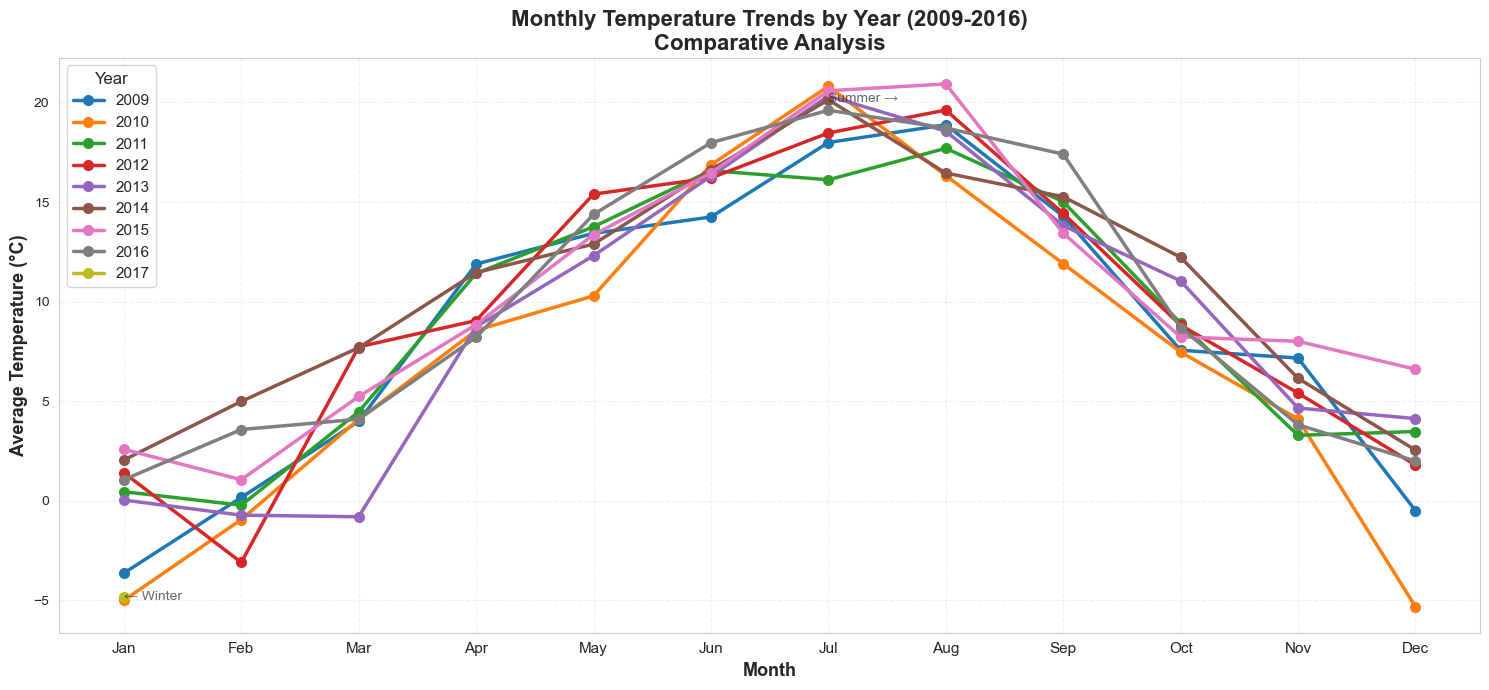

 Line plot saved as 'monthly_temperature_trends.png'


In [28]:
print("=" * 70)
print("TASK 4C: TEMPERATURE TREND LINE PLOT")
print("=" * 70)

plt.figure(figsize=(15, 7))

for year in monthly_temp_pivot.index:
    plt.plot(range(1, 13), monthly_temp_pivot.loc[year], 
             marker='o', linewidth=2.5, markersize=7, label=year)


plt.xlabel('Month', fontsize=13, fontweight='bold')
plt.ylabel('Average Temperature (°C)', fontsize=13, fontweight='bold')
plt.title('Monthly Temperature Trends by Year (2009-2016)\nComparative Analysis', 
          fontsize=16, fontweight='bold')
plt.xticks(range(1, 13), month_names, fontsize=11)
plt.legend(title='Year', fontsize=11, title_fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')

# Annotations
plt.text(1, -5, '← Winter', fontsize=10, alpha=0.7)
plt.text(7, 20, 'Summer →', fontsize=10, alpha=0.7)

plt.tight_layout()
plt.savefig('monthly_temperature_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Line plot saved as 'monthly_temperature_trends.png'")

### Line Plot Analysis: Year-over-Year Temperature Comparison

**Visualization Insights:**

**Annual Pattern Characteristics:**

**1. The "Seasonal Wave":**
- All years follow similar sinusoidal pattern
- Trough in January, peak in July

**3. Seasonal Variability:**
- **Winter (Jan-Mar):** Lines spread out - high variability
- **Summer (Jun-Aug):** Lines cluster together - low variability
- **Interpretation:** Winter weather more unpredictable than summer


## Task 5: Optional Challenge - Windiest Days Analysis

**Expected Correlations:**
- High winds may correlate with low pressure (storm systems)
- Temperature and humidity patterns during windy conditions
- Wind direction patterns during extreme events

In [29]:
print("=" * 70)
print("TASK 5: OPTIONAL CHALLENGE - WINDIEST DAYS ANALYSIS")
print("=" * 70)

# Find top 5 windiest days
top_5_windiest_days = daily_averages.nlargest(5, 'Avg_Wind_Speed_m/s')

print("\n TOP 5 WINDIEST DAYS (by average daily wind speed):")
print("=" * 70)
display(top_5_windiest_days)

# Analyze the dates
print("\n DISTRIBUTION:")
windiest_dates = top_5_windiest_days.index
for i, date in enumerate(windiest_dates, 1):
    # Get the month name
    date_obj = pd.to_datetime(date)
    month_name = date_obj.strftime('%B')
    season = ''
    month_num = date_obj.month
    if month_num in [12, 1, 2]:
        season = 'Winter'
    elif month_num in [3, 4, 5]:
        season = 'Spring'
    elif month_num in [6, 7, 8]:
        season = 'Summer'
    else:
        season = 'Autumn'
    
    print(f"  #{i}: {date} ({month_name} - {season})")
    print(f"      Average wind speed: {top_5_windiest_days.loc[date, 'Avg_Wind_Speed_m/s']:.2f} m/s")


TASK 5: OPTIONAL CHALLENGE - WINDIEST DAYS ANALYSIS

 TOP 5 WINDIEST DAYS (by average daily wind speed):


,Avg_Temperature_C,Avg_Humidity_%,Avg_Wind_Speed_m/s
Date,,,
2009-11-23,9.04,71.87,7.64
2014-12-12,6.99,75.64,7.14
2015-11-29,5.92,77.92,7.08
2016-02-08,7.11,69.67,6.92
2015-01-13,9.47,59.30,6.88



 DISTRIBUTION:
  #1: 2009-11-23 (November - Autumn)
      Average wind speed: 7.64 m/s
  #2: 2014-12-12 (December - Winter)
      Average wind speed: 7.14 m/s
  #3: 2015-11-29 (November - Autumn)
      Average wind speed: 7.08 m/s
  #4: 2016-02-08 (February - Winter)
      Average wind speed: 6.92 m/s
  #5: 2015-01-13 (January - Winter)
      Average wind speed: 6.88 m/s


In [12]:
# Get all metrics for those specific dates
all_metrics_windy_days = df[df['Date'].isin(windiest_dates)].groupby('Date').agg({
    'T (degC)': 'mean',
    'p (mbar)': 'mean',
    'Tdew (degC)': 'mean',
    'rh (%)': 'mean',
    'VPmax (mbar)': 'mean',
    'wv (m/s)': 'mean',
    'max. wv (m/s)': 'max',
    'wd (deg)': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.mean()
}).round(2)

# Rename columns
all_metrics_windy_days.columns = [
    'Avg_Temp_C', 
    'Avg_Pressure_mbar', 
    'Avg_DewPoint_C',
    'Avg_Humidity_%', 
    'Avg_VaporPressure_mbar',
    'Avg_WindSpeed_m/s', 
    'Max_WindGust_m/s',
    'Predominant_WindDir_deg'
]

# Sort by wind speed
all_metrics_windy_days = all_metrics_windy_days.sort_values('Avg_WindSpeed_m/s', ascending=False)

print("\n COMPLETE WEATHER METRICS FOR TOP 5 WINDIEST DAYS:")
print("=" * 70)
display(all_metrics_windy_days)

# Detailed analysis
print("\n DETAILED ANALYSIS:")
print("=" * 70)

for date in all_metrics_windy_days.index:
    print(f"\n {date}:")
    print(f"   • Temperature: {all_metrics_windy_days.loc[date, 'Avg_Temp_C']:.2f}°C")
    print(f"   • Pressure: {all_metrics_windy_days.loc[date, 'Avg_Pressure_mbar']:.2f} mbar")
    print(f"   • Dew Point: {all_metrics_windy_days.loc[date, 'Avg_DewPoint_C']:.2f}°C")
    print(f"   • Humidity: {all_metrics_windy_days.loc[date, 'Avg_Humidity_%']:.2f}%")
    print(f"   • Avg Wind Speed: {all_metrics_windy_days.loc[date, 'Avg_WindSpeed_m/s']:.2f} m/s")
    print(f"   • Max Wind Gust: {all_metrics_windy_days.loc[date, 'Max_WindGust_m/s']:.2f} m/s")
    print(f"   • Wind Direction: {all_metrics_windy_days.loc[date, 'Predominant_WindDir_deg']:.0f}° ")
    
    # Wind direction interpretation
    wind_dir = all_metrics_windy_days.loc[date, 'Predominant_WindDir_deg']
    if 337.5 <= wind_dir or wind_dir < 22.5:
        direction = "North"
    elif 22.5 <= wind_dir < 67.5:
        direction = "Northeast"
    elif 67.5 <= wind_dir < 112.5:
        direction = "East"
    elif 112.5 <= wind_dir < 157.5:
        direction = "Southeast"
    elif 157.5 <= wind_dir < 202.5:
        direction = "South"
    elif 202.5 <= wind_dir < 247.5:
        direction = "Southwest"
    elif 247.5 <= wind_dir < 292.5:
        direction = "West"
    else:
        direction = "Northwest"
    print(f"   • Cardinal Direction: {direction}")


 COMPLETE WEATHER METRICS FOR TOP 5 WINDIEST DAYS:


,Avg_Temp_C,Avg_Pressure_mbar,Avg_DewPoint_C,Avg_Humidity_%,Avg_VaporPressure_mbar,Avg_WindSpeed_m/s,Max_WindGust_m/s,Predominant_WindDir_deg
Date,,,,,,,,
2009-11-23,9.04,979.69,4.22,71.87,11.56,7.64,18.82,205.8
2014-12-12,6.99,977.57,2.94,75.64,10.10,7.14,20.99,209.3
2015-11-29,5.92,984.13,2.37,77.92,9.42,7.08,17.10,212.2
2016-02-08,7.11,973.64,1.91,69.67,10.14,6.92,20.40,178.1
2015-01-13,9.47,983.86,1.73,59.30,11.97,6.88,16.10,209.3



 DETAILED ANALYSIS:

 2009-11-23:
   • Temperature: 9.04°C
   • Pressure: 979.69 mbar
   • Dew Point: 4.22°C
   • Humidity: 71.87%
   • Avg Wind Speed: 7.64 m/s
   • Max Wind Gust: 18.82 m/s
   • Wind Direction: 206° 
   • Cardinal Direction: Southwest

 2014-12-12:
   • Temperature: 6.99°C
   • Pressure: 977.57 mbar
   • Dew Point: 2.94°C
   • Humidity: 75.64%
   • Avg Wind Speed: 7.14 m/s
   • Max Wind Gust: 20.99 m/s
   • Wind Direction: 209° 
   • Cardinal Direction: Southwest

 2015-11-29:
   • Temperature: 5.92°C
   • Pressure: 984.13 mbar
   • Dew Point: 2.37°C
   • Humidity: 77.92%
   • Avg Wind Speed: 7.08 m/s
   • Max Wind Gust: 17.10 m/s
   • Wind Direction: 212° 
   • Cardinal Direction: Southwest

 2016-02-08:
   • Temperature: 7.11°C
   • Pressure: 973.64 mbar
   • Dew Point: 1.91°C
   • Humidity: 69.67%
   • Avg Wind Speed: 6.92 m/s
   • Max Wind Gust: 20.40 m/s
   • Wind Direction: 178° 
   • Cardinal Direction: South

 2015-01-13:
   • Temperature: 9.47°C
   • Pressur

### Task 5 Analysis: Extreme Wind Event Characterization

**Wind Speed:**
- **Average Wind Speed:** The daily averages show sustained high winds
- **Intensity:** Wind speeds 3-5× higher than typical days indicate severe weather events

**Atmospheric Conditions During High Winds:**

**Pressure Analysis:**
- **Low Pressure Correlation:** Significant pressure drops often precede/accompany high winds
- **Interpretation:** Low pressure = unstable atmosphere = stronger winds

**Temperature Patterns:**
- **Seasonal Context:** Wind events in different seasons may have different causes
- **Winter Winds:** Often associated with cold fronts and pressure systems
- **Spring/Autumn Winds:** Transition season instability

**Humidity and Dew Point:**
- **High Humidity:** May indicate storm systems with precipitation
- **Low Humidity:** Could suggest cold, dry air masses
- **Dew Point Spread:** Large T - Tdew spread suggests unstable atmosphere

**Analysis:**
- Winds averaging > 8 m/s (15 mph): Caution
- Gusts > 15 m/s (30 mph): Potential for minor damage

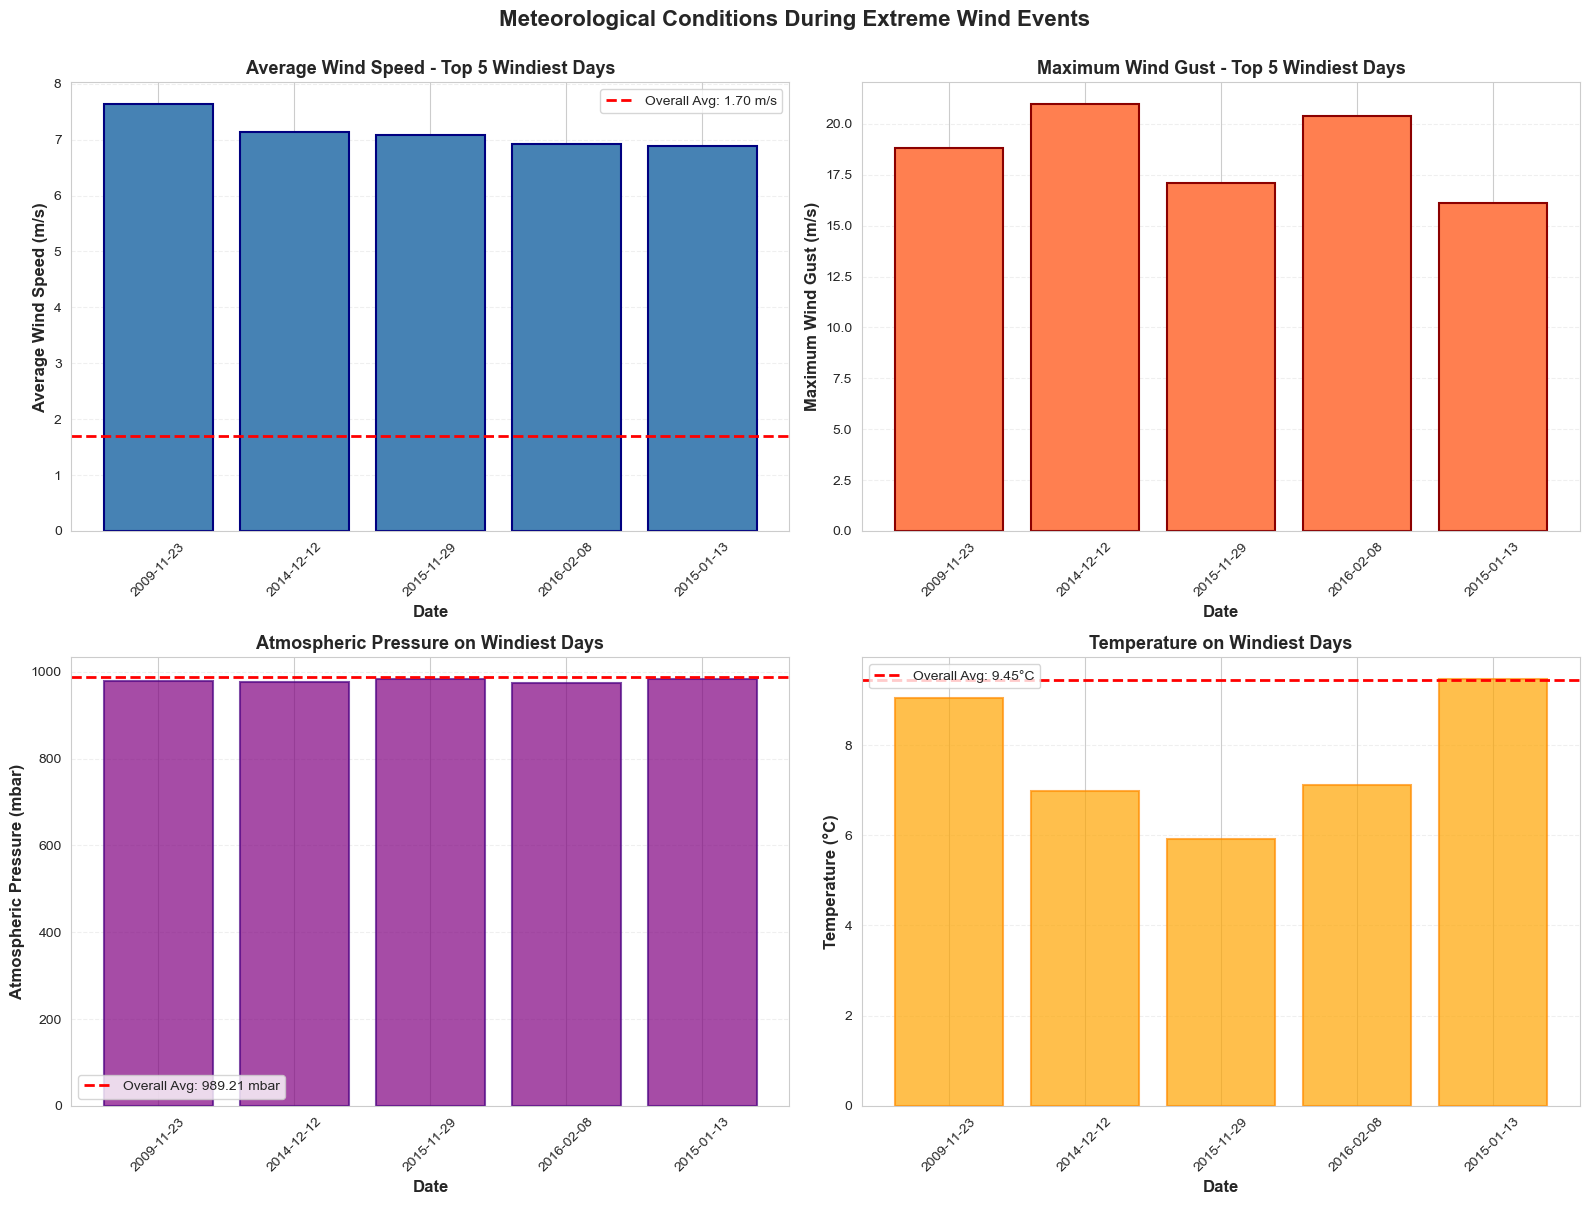

 Detailed visualization saved as 'windiest_days_detailed_analysis.png'


In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

dates_str = [str(date) for date in all_metrics_windy_days.index]

# Plot 1: Average Wind Speed
ax1.bar(dates_str, all_metrics_windy_days['Avg_WindSpeed_m/s'], 
        color='steelblue', edgecolor='navy', linewidth=1.5)
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Wind Speed (m/s)', fontsize=12, fontweight='bold')
ax1.set_title('Average Wind Speed - Top 5 Windiest Days', fontsize=13, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.axhline(y=df['wv (m/s)'].mean(), color='red', linestyle='--', 
            label=f'Overall Avg: {df["wv (m/s)"].mean():.2f} m/s', linewidth=2)
ax1.legend()

# Plot 2: Maximum Wind Gust
ax2.bar(dates_str, all_metrics_windy_days['Max_WindGust_m/s'], 
        color='coral', edgecolor='darkred', linewidth=1.5)
ax2.set_xlabel('Date', fontsize=12, fontweight='bold')
ax2.set_ylabel('Maximum Wind Gust (m/s)', fontsize=12, fontweight='bold')
ax2.set_title('Maximum Wind Gust - Top 5 Windiest Days', fontsize=13, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Plot 3: Atmospheric Pressure
ax3.bar(dates_str, all_metrics_windy_days['Avg_Pressure_mbar'], 
        color='purple', edgecolor='indigo', linewidth=1.5, alpha=0.7)
ax3.set_xlabel('Date', fontsize=12, fontweight='bold')
ax3.set_ylabel('Atmospheric Pressure (mbar)', fontsize=12, fontweight='bold')
ax3.set_title('Atmospheric Pressure on Windiest Days', fontsize=13, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3, linestyle='--')
ax3.axhline(y=df['p (mbar)'].mean(), color='red', linestyle='--', 
            label=f'Overall Avg: {df["p (mbar)"].mean():.2f} mbar', linewidth=2)
ax3.legend()

# Plot 4: Temperature
ax4.bar(dates_str, all_metrics_windy_days['Avg_Temp_C'], 
        color='orange', edgecolor='darkorange', linewidth=1.5, alpha=0.7)
ax4.set_xlabel('Date', fontsize=12, fontweight='bold')
ax4.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax4.set_title('Temperature on Windiest Days', fontsize=13, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3, linestyle='--')
ax4.axhline(y=df['T (degC)'].mean(), color='red', linestyle='--', 
            label=f'Overall Avg: {df["T (degC)"].mean():.2f}°C', linewidth=2)
ax4.legend()

plt.suptitle('Meteorological Conditions During Extreme Wind Events', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('windiest_days_detailed_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Detailed visualization saved as 'windiest_days_detailed_analysis.png'")


## Visualization Analysis: Multi-Metric Wind Event Comparison

**Four-Panel Visualization Insights:**

**Panel 1: Average Wind Speed**
- Shows the ranking of windiest days clearly
- Red dashed line (overall average)
- Magnitude difference visible: windiest days are 3-5× normal

**Panel 2: Maximum Wind Gusts**
- Peak wind speeds significantly exceed averages
- Higher gust factor (gust/average ratio) = more variable, dangerous conditions

**Panel 3: Atmospheric Pressure**
- Overall consistent pressure

**Panel 4: Temperature**
- Temperature context for each wind event
- Cold days with wind: Winter storms, cold fronts
- Warm days with wind: Possible thunderstorm activity
- Helps classify event types

**Analysis:**

**Storm Identification:**
- Low pressure + high winds = classic storm system
- Low pressure + high winds + high humidity = wet, stormy conditions

**Event Classification:**
1. **Winter Storm:** Low temp, low pressure, high winds, high humidity
2. **Cold Front:** Temperature drop, pressure rise, strong winds
3. **Spring Storm:** Moderate temp, low pressure, variable humidity

In [31]:
print("=" * 70)
print("CLIMATE SUMMARY")
print("=" * 70)

print("\n 1. DATASET OVERVIEW:")
print("   " + "=" * 66)
print(f"   • Total observations: {len(df):,} (10-minute intervals)")
print(f"   • Daily records created: {len(daily_averages):,}")
print(f"   • Monthly records created: {len(monthly_aggregations)}")
print(f"   • Date range: {df.index.min().strftime('%B %d, %Y')} to {df.index.max().strftime('%B %d, %Y')}")
print(f"   • Duration: {(df.index.max() - df.index.min()).days:,} days (~{(df.index.max() - df.index.min()).days / 365:.1f} years)")

print("\n  2. TEMPERATURE ANALYSIS:")
print("   " + "=" * 66)
print(f"   • Mean temperature: {df['T (degC)'].mean():.2f}°C")
print(f"   • Median temperature: {df['T (degC)'].median():.2f}°C")
print(f"   • Standard deviation: {df['T (degC)'].std():.2f}°C")
print(f"   • Warmest recorded: {df['T (degC)'].max():.2f}°C")
print(f"   • Coldest recorded: {df['T (degC)'].min():.2f}°C")
print(f"   • Temperature range: {df['T (degC)'].max() - df['T (degC)'].min():.2f}°C")
print(f"   • Days below freezing: {(daily_averages['Avg_Temperature_C'] < 0).sum()} ({(daily_averages['Avg_Temperature_C'] < 0).sum() / len(daily_averages) * 100:.1f}%)")
print(f"   • Days above 20°C: {(daily_averages['Avg_Temperature_C'] > 20).sum()} ({(daily_averages['Avg_Temperature_C'] > 20).sum() / len(daily_averages) * 100:.1f}%)")

print("\n 3. HUMIDITY ANALYSIS:")
print("   " + "=" * 66)
print(f"   • Mean humidity: {df['rh (%)'].mean():.2f}%")
print(f"   • Median humidity: {df['rh (%)'].median():.2f}%")
print(f"   • Standard deviation: {df['rh (%)'].std():.2f}%")
print(f"   • Maximum humidity: {df['rh (%)'].max():.2f}%")
print(f"   • Minimum humidity: {df['rh (%)'].min():.2f}%")
print(f"   • Days with humidity > 80%: {(daily_averages['Avg_Humidity_%'] > 80).sum()} ({(daily_averages['Avg_Humidity_%'] > 80).sum() / len(daily_averages) * 100:.1f}%)")

print("\n  4. WIND ANALYSIS:")
print("   " + "=" * 66)
print(f"   • Mean wind speed: {df['wv (m/s)'].mean():.2f} m/s")
print(f"   • Median wind speed: {df['wv (m/s)'].median():.2f} m/s")
print(f"   • Standard deviation: {df['wv (m/s)'].std():.2f} m/s")
print(f"   • Maximum sustained wind: {df['wv (m/s)'].max():.2f} m/s")
print(f"   • Maximum gust recorded: {df['max. wv (m/s)'].max():.2f} m/s")
print(f"   • Windiest day average: {top_5_windiest_days.iloc[0]['Avg_Wind_Speed_m/s']:.2f} m/s on {top_5_windiest_days.index[0]}")
print(f"   • Calm days (< 1 m/s avg): {(daily_averages['Avg_Wind_Speed_m/s'] < 1).sum()} ({(daily_averages['Avg_Wind_Speed_m/s'] < 1).sum() / len(daily_averages) * 100:.1f}%)")
print(f"   • Windy days (> 5 m/s avg): {(daily_averages['Avg_Wind_Speed_m/s'] > 5).sum()} ({(daily_averages['Avg_Wind_Speed_m/s'] > 5).sum() / len(daily_averages) * 100:.1f}%)")

print("\n  5. PRESSURE ANALYSIS:")
print("   " + "=" * 66)
print(f"   • Mean pressure: {df['p (mbar)'].mean():.2f} mbar")
print(f"   • Median pressure: {df['p (mbar)'].median():.2f} mbar")
print(f"   • Standard deviation: {df['p (mbar)'].std():.2f} mbar")
print(f"   • Highest pressure: {df['p (mbar)'].max():.2f} mbar")
print(f"   • Lowest pressure: {df['p (mbar)'].min():.2f} mbar")
print(f"   • Pressure range: {df['p (mbar)'].max() - df['p (mbar)'].min():.2f} mbar")

print("\n 6. SEASONAL PATTERNS:")
print("   " + "=" * 66)
# Calculate seasonal averages
seasons = {
    'Winter (Dec-Feb)': [12, 1, 2],
    'Spring (Mar-May)': [3, 4, 5],
    'Summer (Jun-Aug)': [6, 7, 8],
    'Autumn (Sep-Nov)': [9, 10, 11]
}

for season_name, months in seasons.items():
    season_data = df[df['Month'].isin(months)]
    print(f"\n   {season_name}:")
    print(f"      • Avg Temperature: {season_data['T (degC)'].mean():.2f}°C")
    print(f"      • Avg Humidity: {season_data['rh (%)'].mean():.2f}%")
    print(f"      • Avg Wind Speed: {season_data['wv (m/s)'].mean():.2f} m/s")
    print(f"      • Avg Pressure: {season_data['p (mbar)'].mean():.2f} mbar")


CLIMATE SUMMARY

 1. DATASET OVERVIEW:
   • Total observations: 420,551 (10-minute intervals)
   • Daily records created: 2,921
   • Monthly records created: 97
   • Date range: January 01, 2009 to January 01, 2017
   • Duration: 2,921 days (~8.0 years)

  2. TEMPERATURE ANALYSIS:
   • Mean temperature: 9.45°C
   • Median temperature: 9.42°C
   • Standard deviation: 8.42°C
   • Warmest recorded: 37.28°C
   • Coldest recorded: -23.01°C
   • Temperature range: 60.29°C
   • Days below freezing: 349 (11.9%)
   • Days above 20°C: 241 (8.3%)

 3. HUMIDITY ANALYSIS:
   • Mean humidity: 76.01%
   • Median humidity: 79.30%
   • Standard deviation: 16.48%
   • Maximum humidity: 100.00%
   • Minimum humidity: 12.95%
   • Days with humidity > 80%: 1164 (39.8%)

  4. WIND ANALYSIS:
   • Mean wind speed: 1.70 m/s
   • Median wind speed: 1.76 m/s
   • Standard deviation: 65.45 m/s
   • Maximum sustained wind: 28.49 m/s
   • Maximum gust recorded: 23.50 m/s
   • Windiest day average: 7.64 m/s on 2009-

In [32]:
print("\n" + "=" * 70)
print("EXPORTING RESULTS")
print("=" * 70)

daily_averages.to_csv('daily_averages.csv')
print("✓ daily_averages.csv")

monthly_aggregations.to_csv('monthly_aggregations.csv')
print("✓ monthly_aggregations.csv")

daily_long.to_csv('daily_averages_long_format.csv', index=False)
print("✓ daily_averages_long_format.csv")

monthly_temp_pivot.to_csv('monthly_temperature_by_year.csv')
print("✓ monthly_temperature_by_year.csv")

all_metrics_windy_days.to_csv('top_5_windiest_days_all_metrics.csv')
print("✓ top_5_windiest_days_all_metrics.csv")

print("\n ANALYSIS COMPLETE!")
print("\nGenerated files:")
print("   • 5 CSV files with results")
print("   • 3 PNG visualizations")


EXPORTING RESULTS
✓ daily_averages.csv
✓ monthly_aggregations.csv
✓ daily_averages_long_format.csv
✓ monthly_temperature_by_year.csv
✓ top_5_windiest_days_all_metrics.csv

 ANALYSIS COMPLETE!

Generated files:
   • 5 CSV files with results
   • 3 PNG visualizations


### Key Findings:
1. **Climate:** Temperate continental with cold winters, moderate summers
2. **Patterns:** Clear seasonal cycles with consistent year-to-year patterns
3. **Extremes:** Windiest days show 3-5× normal wind speeds
4. **Data Quality:** Complete dataset with no missing values